In [ ]:
#Stock Market Analysis

In [ ]:
#import required libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [ ]:
tech_list = ['AAPL','GOOG','AMZN','MSFT']

end = datetime.now()
start = datetime(end.year - 1,end.month, end.day)

In [ ]:
amazon_df = pd.read_csv("AMZN.csv")

In [ ]:
amazon_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-19,3105.310059,3125.000000,3080.919922,3117.020020,3117.020020,3010300
1,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
3,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
4,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [ ]:
amazon_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,3313.073378,3345.141937,3280.703255,3312.793725,3312.793725,3.435692e+06
std,158.026316,160.108798,158.218431,160.682533,160.682533,1.177184e+06
min,3005.000000,3009.000000,2881.000000,2951.949951,2951.949951,1.451900e+06
25%,3197.989990,3228.577393,3172.244995,3197.342529,3197.342529,2.575450e+06
50%,3305.184936,3331.560059,3277.770019,3300.490112,3300.490112,3.189100e+06
75%,3403.394959,3445.750000,3385.325074,3416.357483,3416.357483,4.033425e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,9.957100e+06


In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


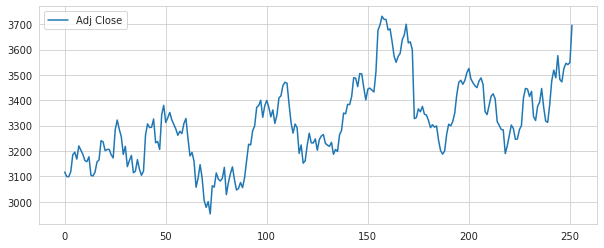

In [ ]:
amazon_df['Adj Close'].plot(legend = True, figsize = (10,4))

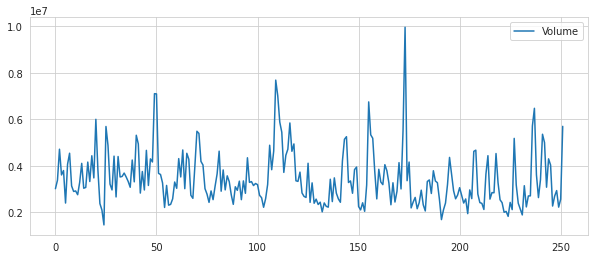

In [ ]:
amazon_df['Volume'].plot(legend = True, figsize = (10,4))

In [ ]:
iex_df = pd.read_csv("IEX.NS.csv")

In [ ]:
iex_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-19,208.300003,210.199997,204.399994,205.449997,202.585648,414450.0
1,2020-11-20,205.449997,208.199997,203.699997,205.149994,202.289825,498424.0
2,2020-11-23,206.050003,207.850006,203.399994,206.600006,203.719620,401493.0
3,2020-11-24,207.600006,214.199997,206.300003,212.250000,209.290848,779999.0
4,2020-11-25,213.899994,216.899994,207.500000,211.750000,208.797821,766334.0
...,...,...,...,...,...,...,...
242,2021-11-12,792.299988,807.000000,786.099976,793.099976,793.099976,7158010.0
243,2021-11-15,795.599976,822.849976,793.500000,812.700012,812.700012,9976093.0
244,2021-11-16,817.650024,822.299988,805.000000,809.400024,809.400024,4525182.0
245,2021-11-17,819.900024,827.000000,812.299988,816.549988,816.549988,6893329.0


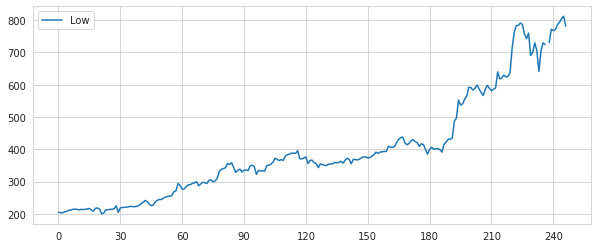

In [ ]:
iex_df['Low'].plot(legend = True,figsize = (10,4),xticks = range(0,247,30))

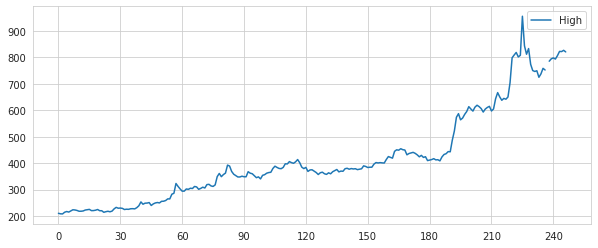

In [ ]:
iex_df['High'].plot(legend = True,figsize = (10,4),x = 'Date',xticks = range(0,247,30))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


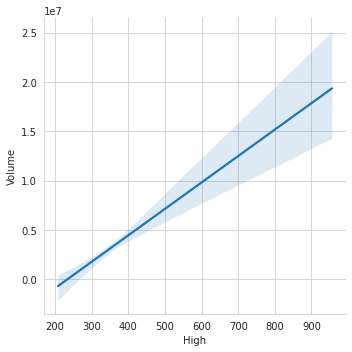

In [ ]:
sns.lmplot('High','Volume',data = iex_df,scatter = False)

In [ ]:
iex_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,405.350609,415.343496,396.603455,405.284959,403.960125,4.854709e+06
std,167.535992,172.960395,162.160014,166.861913,167.695100,7.296482e+06
min,205.449997,207.850006,199.699997,205.149994,202.289825,1.881940e+05
25%,293.812492,302.300003,287.137504,295.212509,294.123291,1.322058e+06
50%,370.074997,377.600006,365.175003,370.875000,369.506622,2.427620e+06
75%,435.549988,443.525009,425.937493,433.537506,431.937920,4.693462e+06
max,876.549988,956.000000,812.299988,845.349976,845.349976,6.536460e+07


In [ ]:
ma_day = [10,20,50]

for ma in ma_day:
  
  column_name = "MA for %s days"%(str(ma))
  
  iex_df[column_name] = pd.DataFrame.rolling(iex_df['Adj Close'],ma)

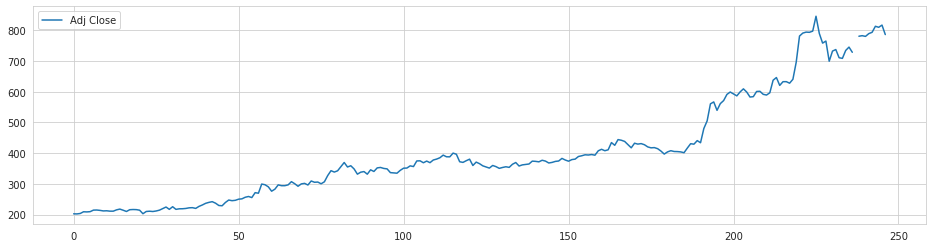

In [ ]:
iex_df[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (16,4))

In [ ]:
iex_df['Daily Return'] = iex_df['Adj Close'].pct_change()

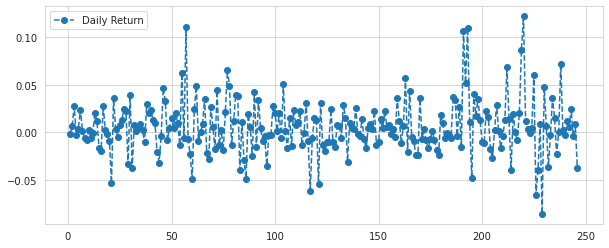

In [ ]:
iex_df['Daily Return'].plot(legend = True , figsize = (10,4) ,linestyle = '--',marker = 'o')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


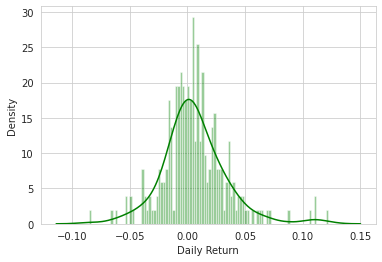

In [ ]:
sns.distplot(iex_df['Daily Return'].dropna(),bins = 100,color = 'green')

In [ ]:
amazon_df['Daily Return'] = amazon_df['Adj Close'].pct_change()

In [ ]:
big = pd.merge(amazon_df,iex_df,on = 'Adj Close',how = 'outer')

In [ ]:
big

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close,Volume_x,Daily Return_x,Date_y,Open_y,High_y,Low_y,Close_y,Volume_y,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return_y
0,2020-11-19,3105.310059,3125.000000,3080.919922,3117.020020,3117.020020,3010300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400.0,-0.005653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900.0,-0.000326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100.0,0.006349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400.0,0.021491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,NaN,NaN,NaN,NaN,NaN,788.799988,NaN,NaN,2021-11-11,779.400024,794.000000,770.900024,788.799988,5031294.0,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]",0.011541
495,NaN,NaN,NaN,NaN,NaN,812.700012,NaN,NaN,2021-11-15,795.599976,822.849976,793.500000,812.700012,9976093.0,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]",0.024713
496,NaN,NaN,NaN,NaN,NaN,809.400024,NaN,NaN,2021-11-16,817.650024,822.299988,805.000000,809.400024,4525182.0,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]",-0.004061
497,NaN,NaN,NaN,NaN,NaN,816.549988,NaN,NaN,2021-11-17,819.900024,827.000000,812.299988,816.549988,6893329.0,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]",0.008834


In [ ]:
amz_adj = DataFrame(amazon_df['Adj Close'])
iex_adj = DataFrame(iex_df['Adj Close'])

In [ ]:
amz_adj

,Adj Close
0,3117.020020
1,3099.399902
2,3098.389893
3,3118.060059
4,3185.070068
...,...
247,3525.149902
248,3545.679932
249,3540.699951
250,3549.000000


In [ ]:
stock_adj = pd.concat([amz_adj,iex_adj],keys = ['A','I'],axis = 1)

In [ ]:
stock_adj

,A,I
,Adj Close,Adj Close
0,3117.020020,202.585648
1,3099.399902,202.289825
2,3098.389893,203.719620
3,3118.060059,209.290848
4,3185.070068,208.797821
...,...,...
247,3525.149902,NaN
248,3545.679932,NaN
249,3540.699951,NaN


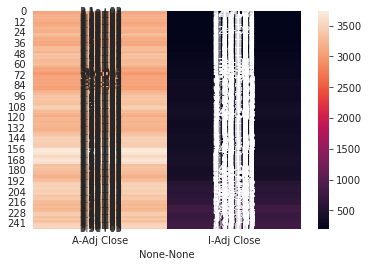

In [ ]:
sns.heatmap(stock_adj.dropna(),annot = True)